https://www.youtube.com/watch?v=IHq1t7NxS8k</br>
https://www.youtube.com/watch?v=01sAkU_NvOY&t=634s

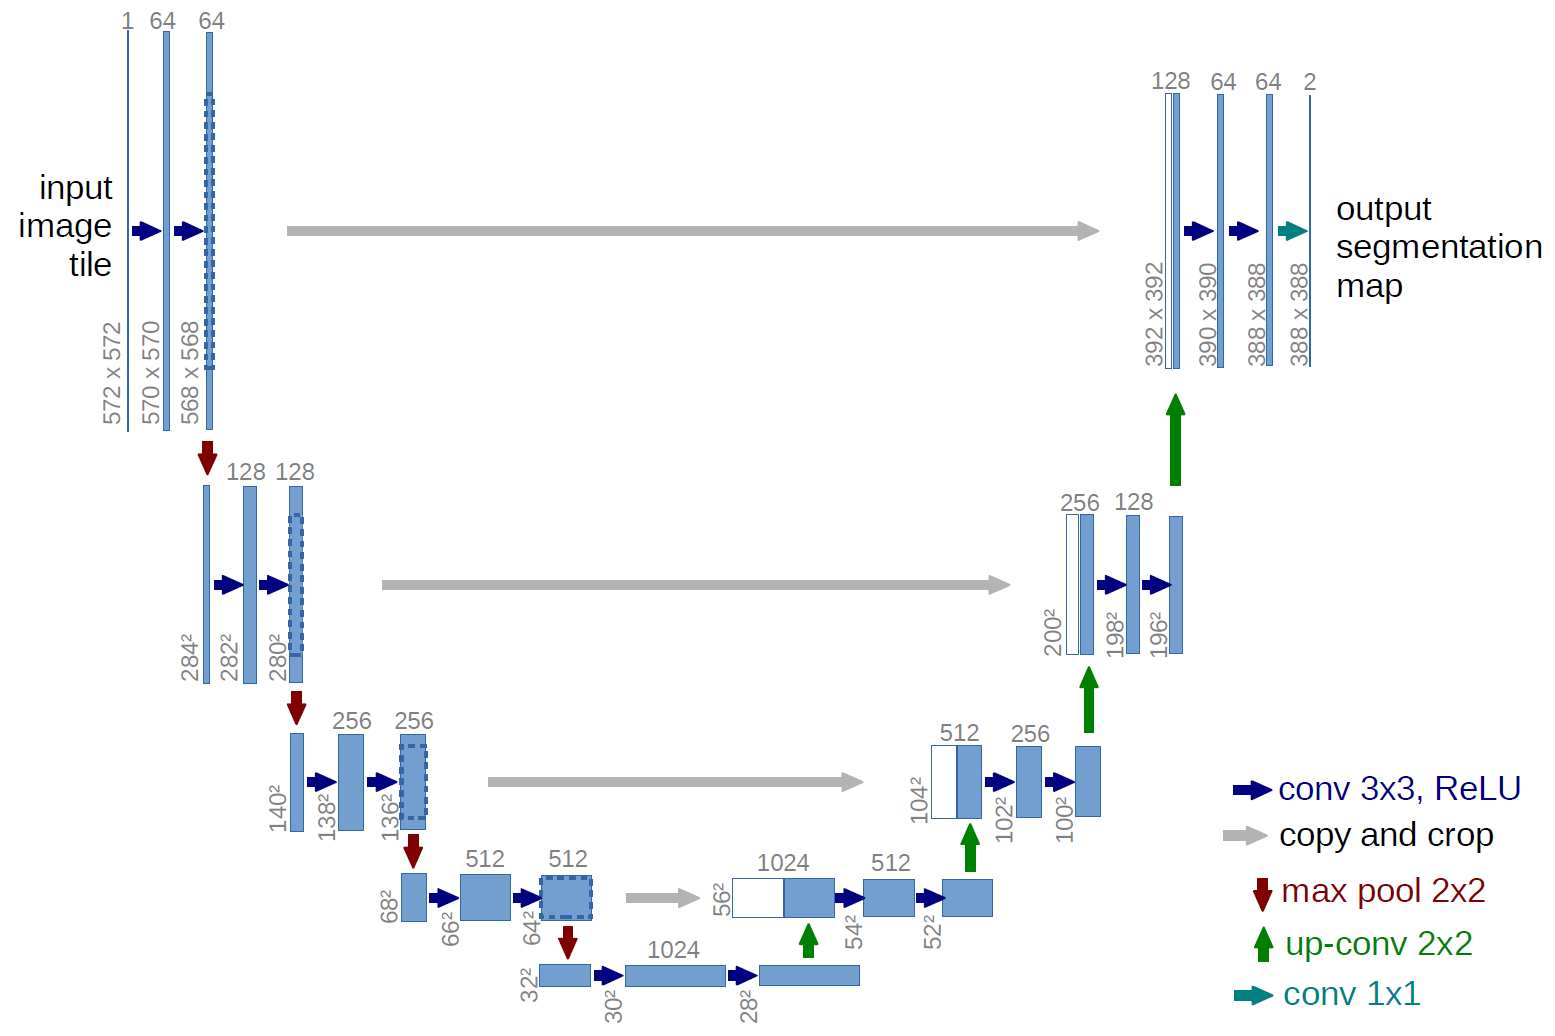

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

In [3]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        # prend les mêmes arguments que nn.Module
        super(DoubleConv, self).__init__()
        # il faut 2 Convs successives
        self.conv = nn.Sequential(
            # 1er Conv2d
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            # le biais sera annulé par BatchNorm2d donc bias=False
            nn.BatchNorm2d(out_channels),
            nn.Relu(inplace=True),
            # 2e Conv2d
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.Relu(inplace=True)
            )
        
    def forward(self, X):
        return self.conv(X)

In [ ]:
class UNET(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64,128,256,512]):
        super(UNET, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # UNET : Down part (1ere partie descendante, de réduction de dims)
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature
            
        # UNET : Up part (2nd partie montante, d'augmentation de dims)
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2)
            )
            
            self.ups.append(DoubleConv(f))
        